# Supermarket Analysis
## Data Visualization & Hypothesis Testing

https://reynaldi-batch11.herokuapp.com/

### Import Pustaka

In [116]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Pada milestone ini didapatkan data penjualan supermarket di 3 kota di Myanmar selama bulan Januari-Maret 2019. Disini kita umpamakan kita adalah market analyst yang ingin mengoptimalkan lagi penjualan.

Dari data ini kita akan menganalisis :
1. Kategori dengan nilai penjualan terbanyak
2. Nilai total penjualan pada setiap kota
3. Trend penjualan selama bulan Januari-Maret 2019 di setiap kota
4. Perbandingan Gross Income dari member dan non-member, hasil ini nantinya akan di uji hipotesis untuk melihat apakah perbedaan nilai dari keduanya signifikan atau tidak.

---

### Data Loading

In [117]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Berikut adalah dataframe dari penjualan di 3 kota di Myanmar.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Dari jumlah non-null count terlihat semua bernilai sama 1000 alias tidak ada nilai null pada dataframe.

### Data Cleaning

In [119]:
df['Date']=pd.to_datetime(df['Date'])

Tahap diatas untuk mengganti tipe data pada kolom date menjadi tipe date untuk nantinya untuk membuat chart trend penjualan.

In [120]:
df.rename(columns = {'Product line' : 'product_line'}, inplace = True)
df.rename(columns = {'gross income' : 'gross_income'}, inplace = True)

Tahap diatas untuk mengganti nama kolom. Kolom yang diganti nantinya akan sering digunakan, untuk menghindari error karena adanya spasi pada nama kolom maka diubah menggunakan ' _ ' .

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Terlihat dari info diatas, kolom date sudah berubah tipe lalu product line dan gross income sudah berubah nama.

## Explorasi Data

<AxesSubplot:xlabel='product_line', ylabel='Total'>

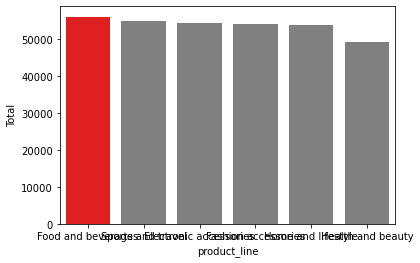

In [122]:
group1=df.groupby(df['product_line'])['Total'].sum().reset_index().sort_values(by='Total',ascending=False)
group1color = ['gray' if (x < max(group1['Total'])) else 'red' for x in group1['Total']]

# bcg2 = bcg.sort_values(by='Invoice ID',ascending=False)
sns.barplot(x=group1['product_line'],y=group1['Total'],palette=group1color)


Chart diatas merupakan visualisasi dari grouping df berdasarkan produk_line dan menghitung sum dari kolom Total

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sports and travel'),
  Text(1, 0, 'Health and beauty'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Electronic accessories'),
  Text(4, 0, 'Fashion accessories'),
  Text(5, 0, 'Food and beverages')])

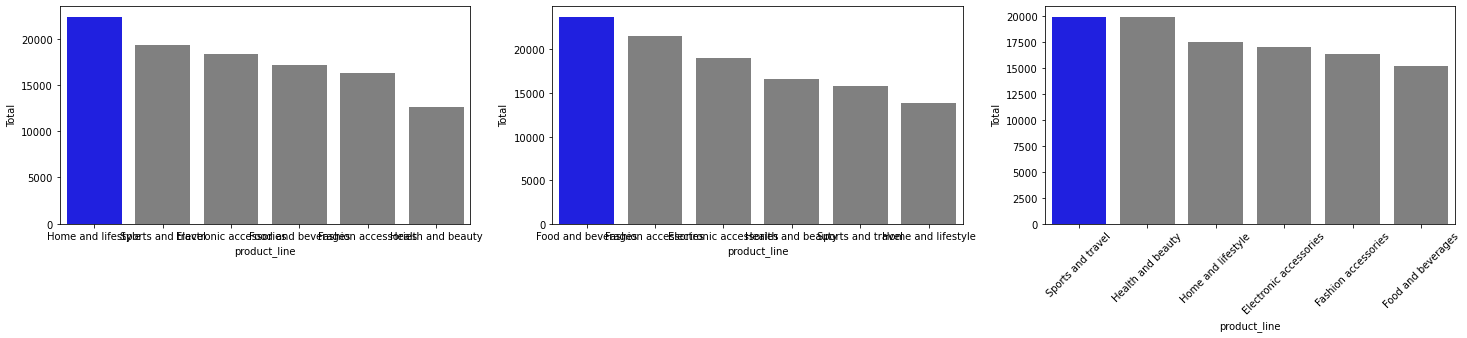

In [123]:
group2=df.groupby(['City','product_line'])['Total'].sum().reset_index().sort_values(by=['Total'],ascending=False)
group2=(group2.reset_index()).drop('index',axis=1)
group2=group2.assign(Rank=group2.index+1)
group2color = ['gray' if (x < max(group2['Total'])) else 'blue' for x in group2['Total']]

fig, ax =plt.subplots(1,3,figsize=(25,4))
sns.barplot(x=(group2[group2['City']=='Yangon'])['product_line'],y=(group2[group2['City']=='Yangon'])['Total'], orient='v',palette=group2color,ax=ax[0])
sns.barplot(x=(group2[group2['City']=='Naypyitaw'])['product_line'],y=(group2[group2['City']=='Naypyitaw'])['Total'], orient='v',palette=group2color,ax=ax[1])
sns.barplot(x=(group2[group2['City']=='Mandalay'])['product_line'],y=(group2[group2['City']=='Mandalay'])['Total'], orient='v',palette=group2color,ax=ax[2])
plt.xticks(rotation=45)

Berikut adalah grafik total nilai penjualan di masing-masing kota, yang pada streamlit user bisa memilih salah satu tampilan grafik

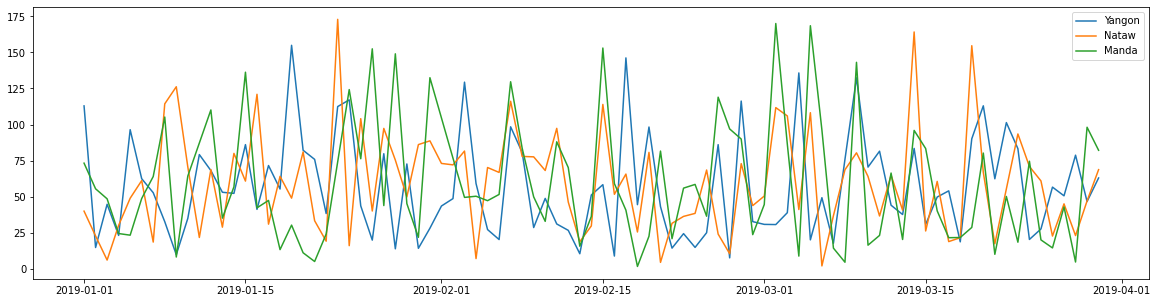

In [124]:
group3=df.groupby(['Date','City'])['gross_income'].sum().reset_index()

yangon = group3.query("City == 'Yangon'")
nataw = group3.query("City == 'Naypyitaw'")
manda = group3.query("City == 'Mandalay'")

x1=yangon['Date']
y1=yangon['gross_income']

plt.figure(figsize=(20,5))
plt.plot(yangon['Date'],yangon['gross_income'],label="Yangon")
plt.plot(nataw['Date'],nataw['gross_income'],label="Nataw")
plt.plot(manda['Date'],manda['gross_income'],label="Manda")
plt.legend()

Berikut adalah grafik trend penjualan dari 3 kota. dari grafik tersebut terlihat cukup fluktuatif.

<AxesSubplot:ylabel='gross_income'>

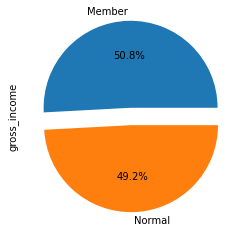

In [125]:
cgross = df.groupby(['Customer type'])['gross_income'].sum()
cgross.plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%')

Yang terakhir adalah grouping Customer type dengan menghitung jumlah Gross Income. Berdasarkan pie chart dan nilai persentase terlihat tidak terlalu signifikan perbedaannya. Untuk mengetahui lebih pasti maka akan dilakukan uji hipotesis

### Sebelum melakukan uji hipotesis sebaiknya kita mencari dulu nilai-nilai penting untuk membantu uji hipotesis
## Central Tendency

In [126]:
print ('Mean :', df['gross_income'].mean())
print ('Median :', df['gross_income'].median())
print ('Mode :', df['gross_income'].mode())

Mean : 15.379369000000002
Median : 12.088000000000001
Mode : 0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
dtype: float64


Berikut adalah nilai central tendency dari keseluruhan data

In [127]:
df1 = df.copy()
df1.rename(columns = {'Customer type' : 'cust_type'}, inplace = True)
Meanmem = (df1.query("cust_type=='Member'"))['gross_income'].mean()
Medianmem =(df1.query("cust_type=='Member'"))['gross_income'].median()
Modemem = (df1.query("cust_type=='Member'"))['gross_income'].mode()
Meannon = (df1.query("cust_type=='Normal'"))['gross_income'].mean()
Mediannon =(df1.query("cust_type=='Normal'"))['gross_income'].median()
Modenon = (df1.query("cust_type=='Normal'"))['gross_income'].mode()

Data diatas adalah central tendency dari masing-masing tipe customer

---

### Measure of Variance

In [128]:
print ('Range :',(df['gross_income'].max() - df['gross_income'].min()))
print ('Standar deviasi :', df['gross_income'].std())
print ('Variance:', df['gross_income'].var())

Range : 49.1415
Standar deviasi : 11.708825480998659
Variance: 137.09659414448348


Berikut adalah nilai variansi dan standar deviasi dari Gross Income keseluruhan data.

---

### Hyphotesis Testing

In [140]:
Memb = df[df['Customer type']=='Member'][['Invoice ID','gross_income']].groupby('Invoice ID').sum()
biasa = df[df['Customer type']=='Normal'][['Invoice ID','gross_income']].groupby('Invoice ID').sum()
print('Rata-rata gross income dari Konsumen dengan status Member :',Meanmem)
print('Rata-rata gross income dari Konsumen dengan status Non-Member :',Meannon)

Rata-rata gross income dari Konsumen dengan status Member : 15.609109780439125
Rata-rata gross income dari Konsumen dengan status Non-Member : 15.148707414829664


In [130]:
t_stat, p_val = stats.ttest_ind(Memb,biasa)
print('P-value:',p_val)#the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: [0.53439496]
t-statistics: [0.62152687]


Nilai P-Value lebih besar dari 0.05

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


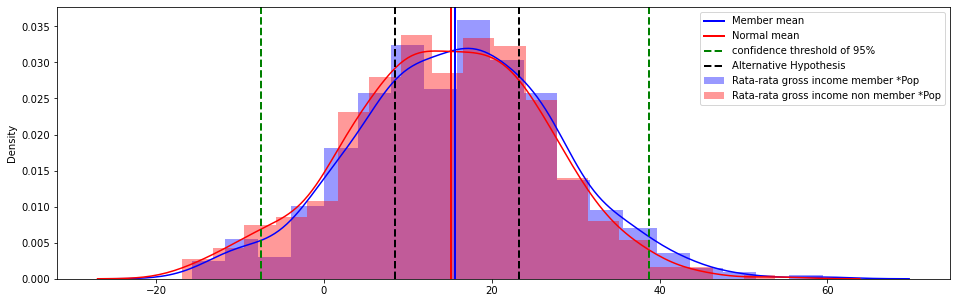

In [131]:
Memb_pop = np.random.normal(Memb.gross_income.mean(), Memb.gross_income.std(),500)
biasa_pop = np.random.normal(biasa.gross_income.mean(), biasa.gross_income.std(),500)

ci = stats.norm.interval(0.95,Memb.gross_income.mean(), Memb.gross_income.std())
plt.figure(figsize=(16,5))
sns.distplot(Memb_pop, label='Rata-rata gross income member *Pop',color='blue')
sns.distplot(biasa_pop, label='Rata-rata gross income non member *Pop',color='red')


plt.axvline(Memb.gross_income.mean(), color='blue', linewidth=2, label='Member mean')
plt.axvline(biasa.gross_income.mean(), color='red',  linewidth=2, label='Normal mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Memb_pop.mean()+t_stat[0]*Memb_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Memb_pop.mean()-t_stat[0]*Memb_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Dari gambar diatas terlihat kedua data mendekati distribusi normal. Nilai P-Value lebih dari 0.05 maka benar tidak ada perbedaan signifikan untuk gross income dari member dan non-member.


## Kesimpulan 
Dari data ini kita akan menganalisis :
1. Kategori dengan nilai penjualan terbanyak adalah **Food and Beverages**
2. Nilai total penjualan pada setiap kota, dan mana yang terbesar :
    - **Yangon : Home and Lifestyle**
    - **Naypyitaw : Food and Beverages**
    - **Mandalay : Sports and Travel**
3. Trend penjualan selama bulan Januari-Maret 2019 di setiap kota terlihat **Fluktuatif**
4. Perbandingan Gross Income dari member dan non-member, **tidak ada perbedaan signifikan**

----